# Bank Marketing - Data Analysis and Machine Learning Project

Variable descriptions (from the ```bank-additional-names.txt``` file in this repo):

#### Bank client data:

- **age**: Age of the client.
- **job**: Type of job that the client works in.
- **marital**: Marital status (divorced, married, single, unknown). _Note:_ "divorced" means divorced or widowed.
- **education**: The educational level of the client.
- **default**: Whether the client has credit in default (no, yes, unknown).
- **housing**: Whether the client has housing loan (no, yes, unknown).
- **loan**: Whether the client has personal loan (no, yes, unknown).

#### Data from the last contact of the current campaign:

- **contact**: Contact communication type (cellular, telephone).
- **month**: Last month of the year that the client has been contacted.
- **duration**: Last contact duration, in seconds.

#### Comparison between this marketing campaign and past marketing campaigns:

- **campaign**: number of contacts performed during this campaign and for this client (includes last contact).
- **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted).
- **previous**: Number of contacts performed before this campaign and for this client.
- **poutcome**: outcome of the previous marketing campaign (failure, non-existent, success).

#### Social and economic context:

This is the additional data that is added after the dataset has been publicized in the UCI Machine Learning Repository (hence the difference between the ```bank``` folder and ```bank_additional``` folder in this repo).

- **emp.var.rate**: Employment variation rate - quarterly indicator
- **cons.price.idx**: Consumer price index - monthly indicator  
- **cons.conf.idx**: Consumer confidence index - monthly indicator  
- **euribor3m**: Euribor 3 month rate - daily indicator
- **nr.employed**: number of employees - quarterly indicator

_Notes:_ Euribor (Euro Interbank Offered Rate) is the interest rate that banks in the European Union borrow funds from each other. There are 5 different types of Euribor rates corresponding to 5 different maturity timeframes: 1 week, 1 month, 3 months, 6 months, and 12 months.

#### Output variable (desired target):

- **y**: Whether the client has subscribed a term deposit (yes/no).

_Notes from the data curator:_ The **duration** attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### I. Import the libraries and the dataset, performing some initial checks of the data

In [44]:
# Import the necessary data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Import the dataset
bank_marketing = pd.read_csv('data/bank-additional/bank-additional-full.csv', delimiter = ';')
bank_marketing.head(10)
# Can also import the dataset using an existing Python library associated with UCI Machine Learning Repository
# https://github.com/uci-ml-repo/ucimlrepo

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
# Number of rows and columns
bank_marketing.shape

(41188, 21)

In [47]:
# Get an overview of numerical columns
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [48]:
# Check for data types
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [49]:
# Check for null values
bank_marketing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The dataset does not have any null values, but according to the variable descriptions, there are some missing values in some categorical columns marked with ```unknown```. In addition, for the ```pdays``` column (number of days after the client was contacted from a previous campaign), the value ```999``` can be treated as missing because it denotes that the client had not been contacted before.

In [50]:
# Check for unique values
bank_marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [51]:
# Check for duplicated rows (except for the first occurence)
print(f'Number of duplicated rows in the dataset: {bank_marketing.duplicated().sum()}')
print(f'The index of duplicated rows: {bank_marketing.duplicated()[bank_marketing.duplicated() == True].index.tolist()}')
# bank_marketing.duplicated()[bank_marketing.duplicated() == True]: only extracts the duplicated rows (except for the first occurence)

Number of duplicated rows in the dataset: 12
The index of duplicated rows: [1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]


In [52]:
# Get the index of duplicated rows (including the first instance):
bank_marketing[bank_marketing.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Because the personally identifiable information such as name, contact point (phone number or email/ social media account), or any generic client ID is suppressed, we did not know exactly if there happens to be more than one client having the same background and living in the same socio-economic indicators. Therefore, we cannot readily drop all duplicates without necessary background information.

However, from my own judgment, when the duplicated columns are located next to their first instances, this might mean an error on the bank's part to process the same person twice in a row. Therefore, I have decided to drop duplicated records that are located next to their first instance. For example, I will drop row ```1266``` because it is located close to a previous instance, row ```1265```.

In [53]:
bank_marketing.drop(bank_marketing.index[[1266, 12261, 18465, 20534, 28477, 36951]], inplace = True)
# Check the shape of the DataFrame after dropping close duplicates
bank_marketing.shape

(41182, 21)

### II. Exploratory data analysis

#### 1. What is the distribution of each numerical column?

Text(0.5, 0.98, 'Distribution of each numerical column in the Bank Marketing dataset (histograms)')

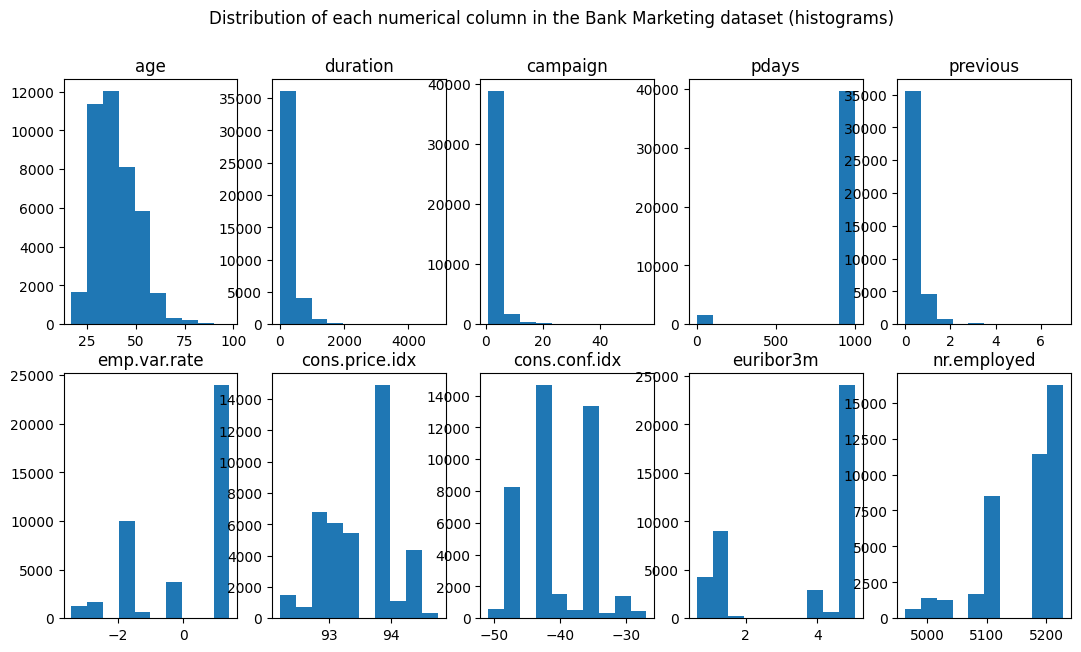

In [96]:
numerical_col_list = [bank_marketing.describe().columns.tolist()] # keep a list of numerical columns
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (13, 7))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_col_list[0]:
    ax[counter // 5][counter % 5].hist(bank_marketing[var])
    ax[counter // 5][counter % 5].set_title(var)
    counter += 1

fig.suptitle('Distribution of each numerical column in the Bank Marketing dataset (histograms)')

Text(0.5, 0.98, 'Distribution of each numerical column in the Bank Marketing dataset (box plots)')

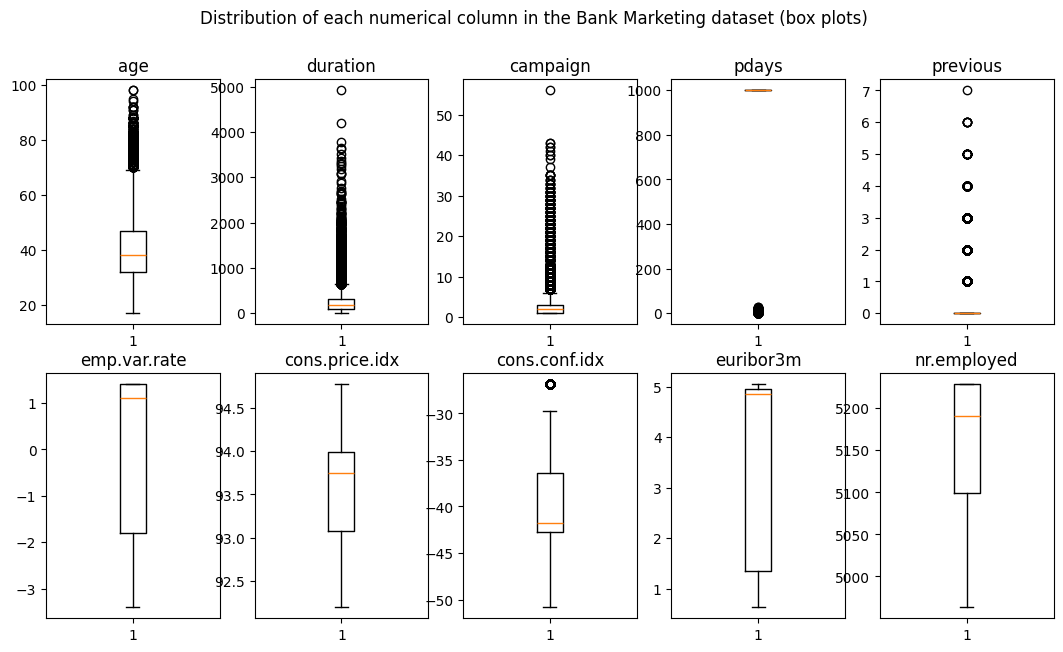

In [97]:
# Look more closely at the distribution metrics
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (13, 7))

counter = 0
for var in numerical_col_list[0]:
    ax[counter // 5][counter % 5].boxplot(bank_marketing[var])
    ax[counter // 5][counter % 5].set_title(var)
    counter += 1

fig.suptitle('Distribution of each numerical column in the Bank Marketing dataset (box plots)')

The presence of the "missing value" ```999``` in the ```pdays``` column, denoting that the client has not been contacted in a previous campaign, has heavily skewed the data. The median is very close to 1000, and there are many outliers under 100, suggesting that the vast majority of clients have not been contacted in the previous campaign.

I decided to visualize the ```pdays``` again, this time distinguishing between the ```999``` values and other smaller values which suggest the client has been contacted before.

Text(0.5, 0.98, 'Days after the client has been contacted in a previous campaign')

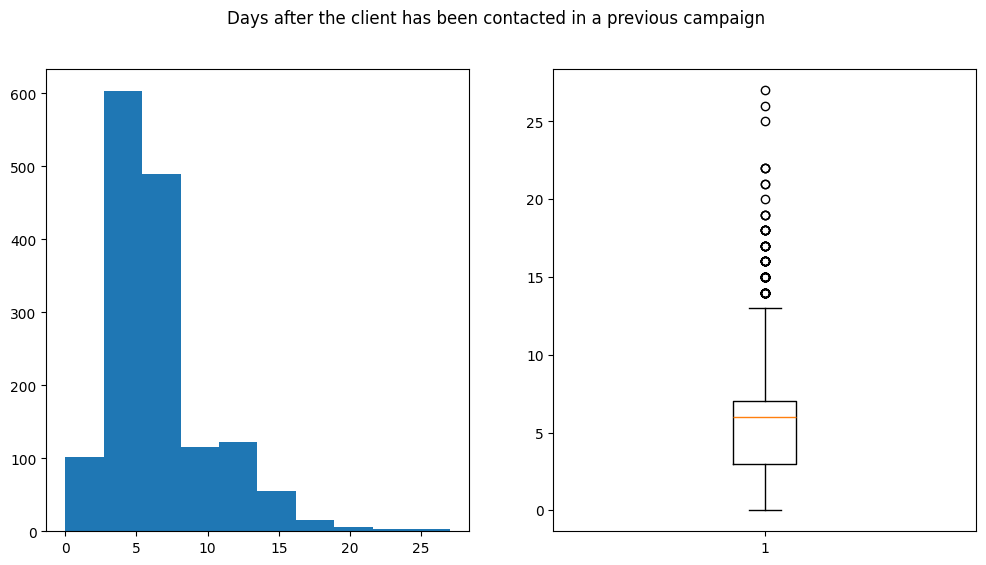

In [80]:
# Distribution of "pdays" without the missing values
pday_dropped = bank_marketing[bank_marketing['pdays'] != 999]
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
ax[0].hist(pday_dropped['pdays'])
ax[1].boxplot(pday_dropped['pdays'])
fig.suptitle('Days after the client has been contacted in a previous campaign')

In [89]:
# Distribution of missing vs. non-missing values
# Add a column to check whether "pdays" value is valid
pday_missing = bank_marketing.copy()
pday_missing['pday_missing'] = np.where(pday_missing['pdays'] == 999, 'missing', 'non-missing')
pday_missing[['pdays', 'pday_missing']].tail(10)

,pdays,pday_missing
41178,6,non-missing
41179,999,missing
41180,999,missing
41181,999,missing
41182,9,non-missing
41183,999,missing
41184,999,missing
41185,999,missing
41186,999,missing
41187,999,missing


<BarContainer object of 2 artists>

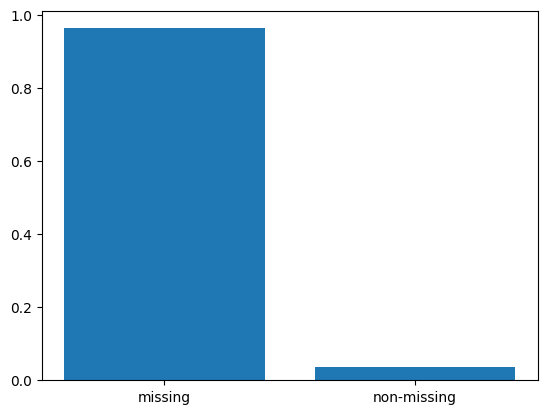

In [93]:
# Visualize the proportion of missing and non-missing values
fig, ax = plt.subplots()
ax.bar(pday_missing['pday_missing'].value_counts().index, pday_missing['pday_missing'].value_counts().values / pday_missing.shape[0])

In [92]:
bank_marketing[bank_marketing['pdays'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25497,31,unemployed,single,professional.course,no,yes,no,cellular,nov,wed,...,1,0,1,success,-0.1,93.200,-42.0,4.120,5195.8,no
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,...,3,0,2,success,-0.1,93.200,-42.0,4.120,5195.8,no
30238,51,technician,married,professional.course,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30314,36,admin.,married,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30417,30,admin.,single,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30688,35,blue-collar,married,basic.6y,unknown,yes,no,cellular,may,tue,...,1,0,1,success,-1.8,92.893,-46.2,1.344,5099.1,no
40360,48,admin.,married,university.degree,no,yes,yes,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40364,27,student,single,university.degree,no,yes,no,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40365,28,student,single,basic.9y,no,yes,no,cellular,aug,wed,...,1,0,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40376,27,student,single,university.degree,no,yes,no,telephone,aug,wed,...,1,0,5,success,-1.7,94.027,-38.3,0.900,4991.6,no


#### 2. What are the categories of each categorical column, and how are they distributed?

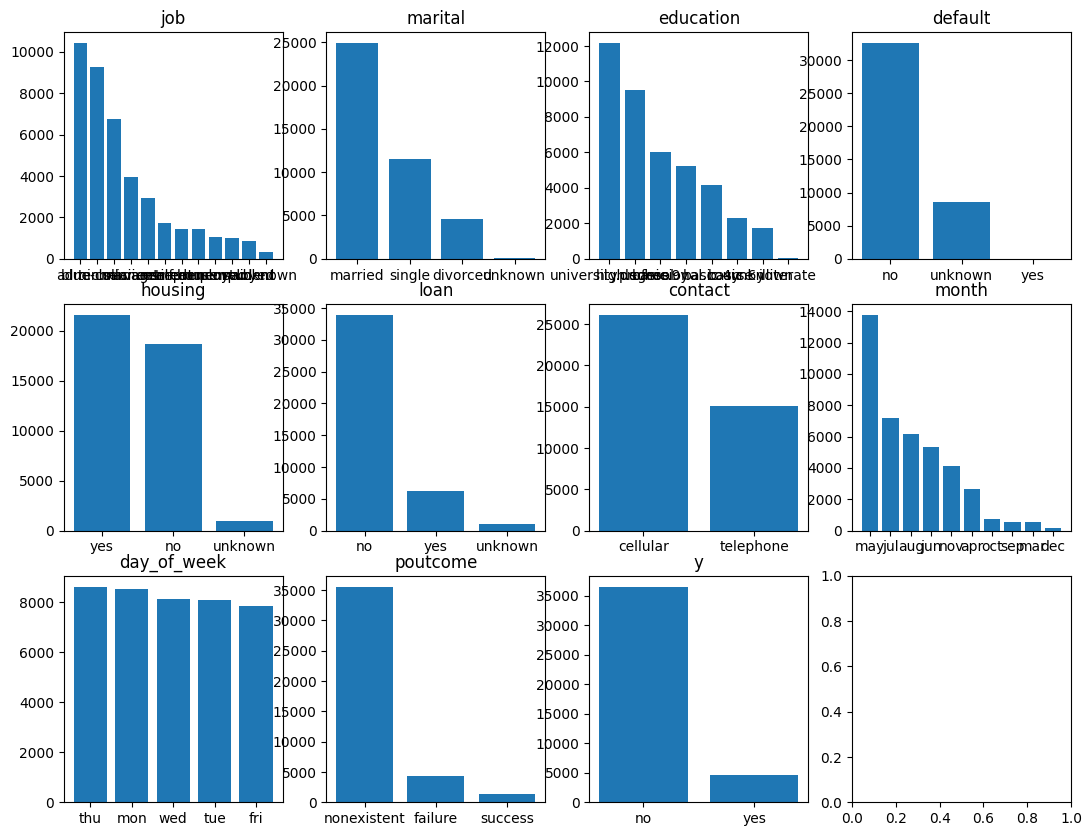

In [56]:
# Drop the numerical columns from the dataset to have a list of categorical columns
categorical_col_list = bank_marketing.drop(bank_marketing.describe().columns.tolist(), axis = 'columns').columns.tolist()
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (13, 10))

counter = 0
for var in categorical_col_list:
    ax_obj = ax[counter // 4][counter % 4]
    ax_obj.bar(bank_marketing[var].value_counts().index, bank_marketing[var].value_counts().values)
    ax_obj.set_title(var)
    counter += 1

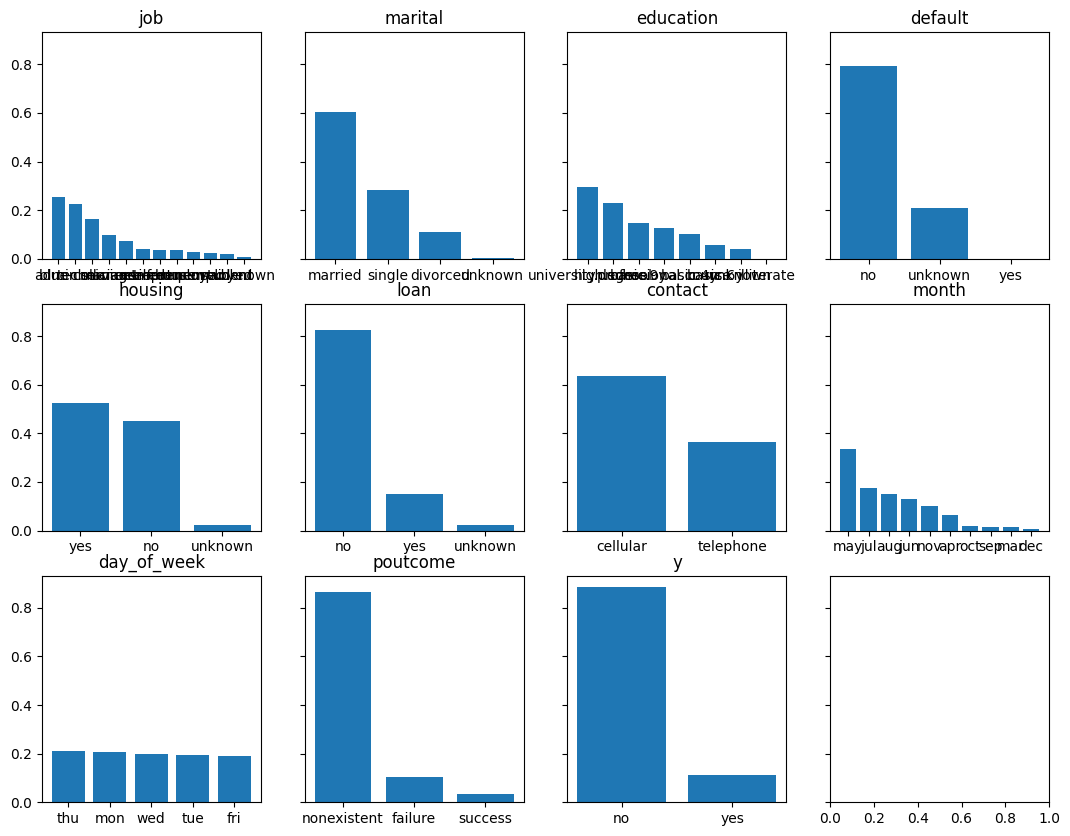

In [98]:
# Visualize the proportion of each category
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (13, 10), sharey = True)

counter = 0
for var in categorical_col_list:
    ax_obj = ax[counter // 4][counter % 4]
    ax_obj.bar(bank_marketing[var].value_counts().index, bank_marketing[var].value_counts().values / bank_marketing.shape[0])
    ax_obj.set_title(var)
    counter += 1

For some variables (such as ```job```, ```education```, and ```month```), the category names may overlap in this large single figure due to lack of space. I decide to plot each of these variable again using separate code blocks to better show their unique category names.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

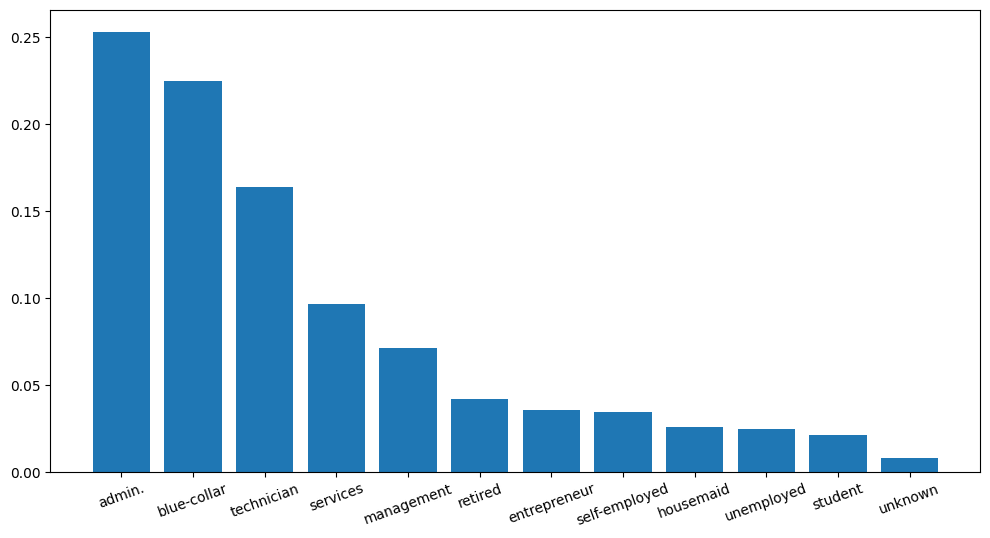

In [58]:
# Zoom in for bar plots with many categories
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['job'].value_counts().index, bank_marketing['job'].value_counts().values / bank_marketing.shape[0])
plt.xticks(rotation = 20)

<BarContainer object of 8 artists>

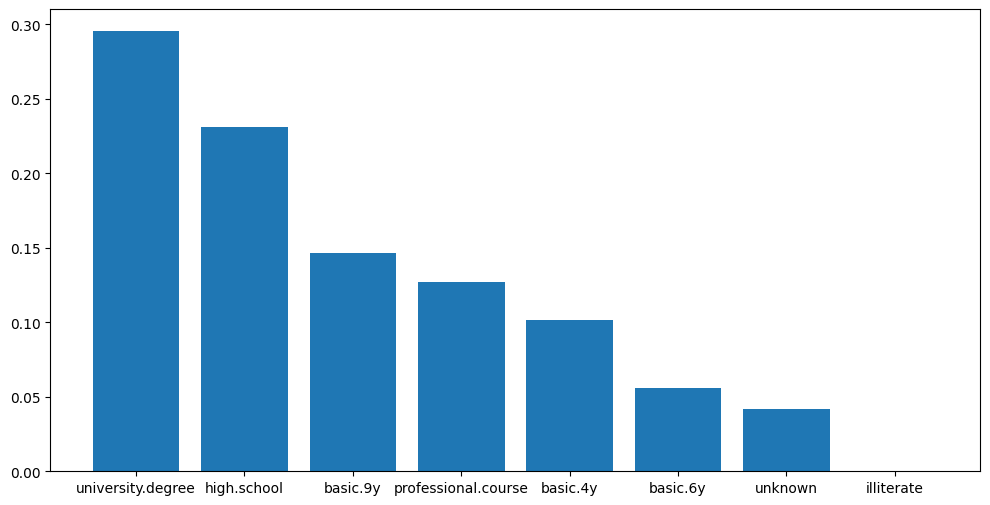

In [59]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['education'].value_counts().index, bank_marketing['education'].value_counts().values / bank_marketing.shape[0])

<BarContainer object of 10 artists>

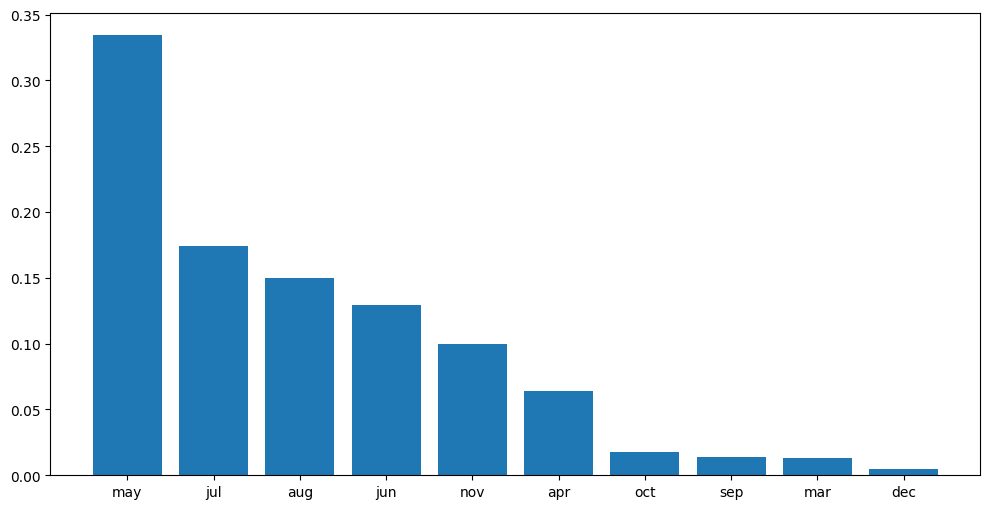

In [60]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['month'].value_counts().index, bank_marketing['month'].value_counts().values / bank_marketing.shape[0])

### III. Pre-processing before implementing classification models